In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import cv2

In [2]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(1,1))
    plt.imshow(out)
    plt.show()

### Color Map

In [35]:
map_v2n = {'w':0,'y':1,'b':2,'g':3,'r':4,'o':5}
map_n2v = [k for k in map_v2n.keys()]
map_n2v

['w', 'y', 'b', 'g', 'r', 'o']

### Read the Data

In [36]:
map_f_name = "files/faces-30x30.csv"
labels_v = open(map_f_name, mode='r', encoding='utf-8-sig').read().replace("\n",",").split(",")[:-1]
labels_n = [map_v2n[i] for i in labels_v]
len(labels_v)

900

0 w


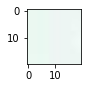

1 w


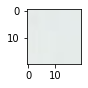

14 w


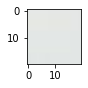

15 w


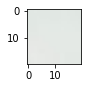

18 w


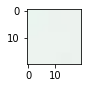

20 w


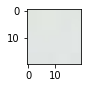

26 w


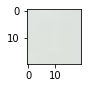

27 w


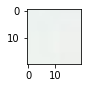

46 w


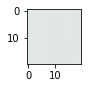

59 w


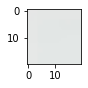

64 w


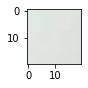

65 w


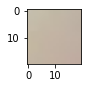

70 w


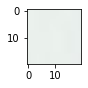

76 w


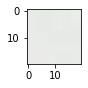

91 w


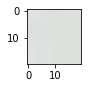

94 w


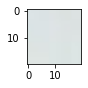

105 w


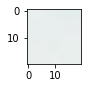

106 w


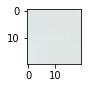

107 w


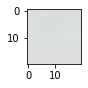

118 w


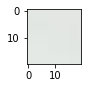

120 w


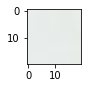

124 w


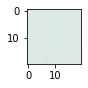

135 w


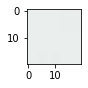

136 w


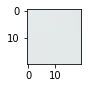

137 w


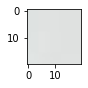

147 w


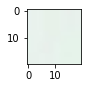

149 w


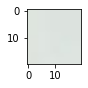

165 w


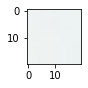

166 w


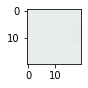

167 w


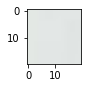

178 w


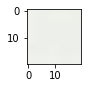

180 w


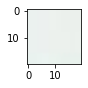

182 w


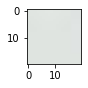

202 w


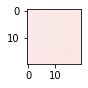

204 w


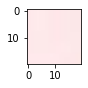

206 w


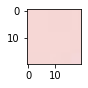

211 w


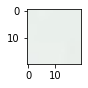

231 w


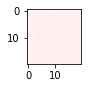

233 w


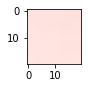

235 w


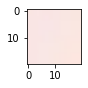

240 w


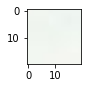

242 w


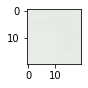

262 w


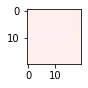

264 w


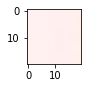

266 w


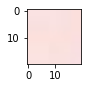

282 w


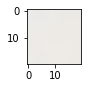

283 w


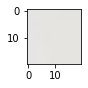

284 w


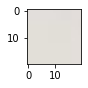

291 w


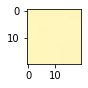

312 w


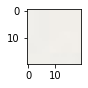

313 w


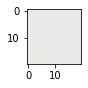

314 w


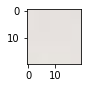

328 w


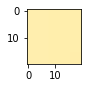

329 w


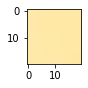

342 w


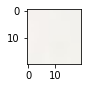

343 w


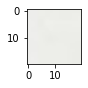

344 w


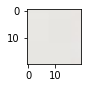

364 w


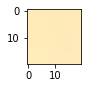

365 w


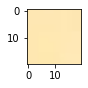

366 w


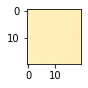

368 w


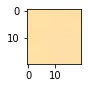

379 w


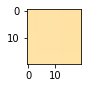

395 w


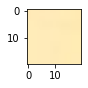

403 w


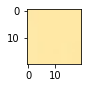

405 w


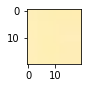

410 w


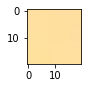

419 w


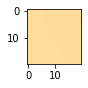

424 w


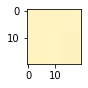

435 w


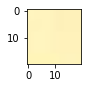

438 w


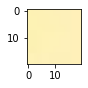

441 w


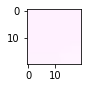

444 w


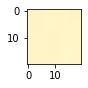

447 w


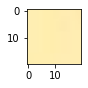

452 w


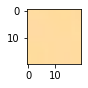

457 w


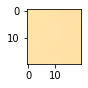

462 w


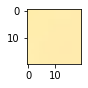

473 w


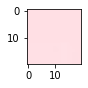

485 w


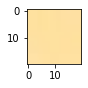

486 w


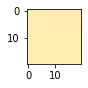

489 w


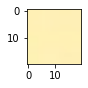

496 w


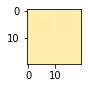

498 w


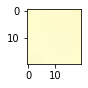

502 w


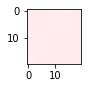

503 w


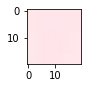

507 w


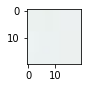

512 w


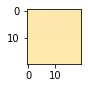

516 w


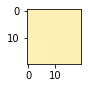

535 w


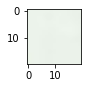

539 w


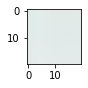

545 w


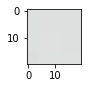

554 w


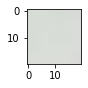

562 w


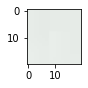

570 w


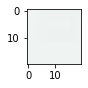

574 w


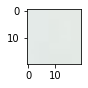

575 w


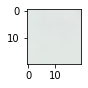

589 w


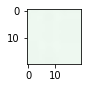

591 w


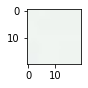

607 w


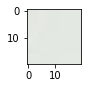

609 w


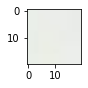

616 w


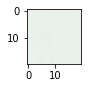

624 w


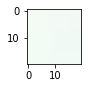

628 w


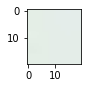

630 w


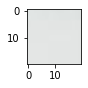

641 w


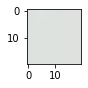

647 w


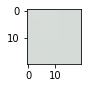

671 w


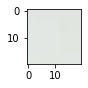

674 w


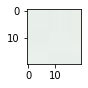

677 w


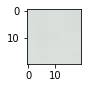

679 w


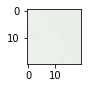

681 w


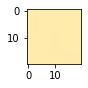

687 w


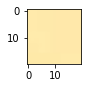

688 w


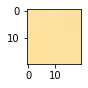

690 w


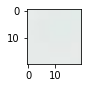

692 w


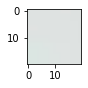

693 w


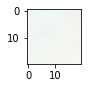

697 w


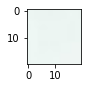

705 w


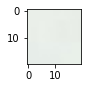

726 w


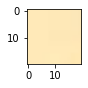

729 w


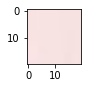

739 w


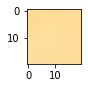

743 w


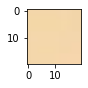

752 w


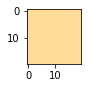

753 w


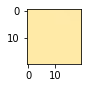

766 w


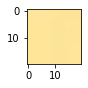

781 w


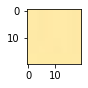

786 w


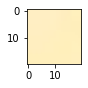

791 w


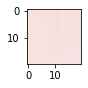

794 w


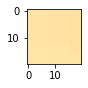

798 w


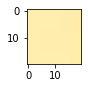

802 w


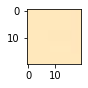

806 w


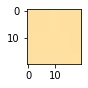

807 w


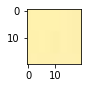

811 w


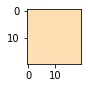

813 w


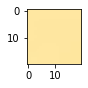

819 w


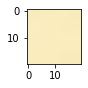

836 w


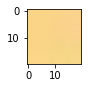

838 w


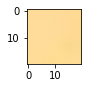

842 w


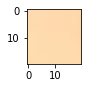

843 w


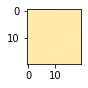

852 w


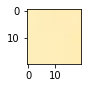

854 w


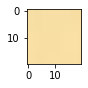

856 w


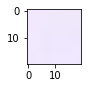

862 w


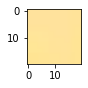

878 w


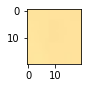

883 w


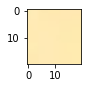

887 w


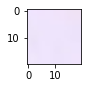

894 w


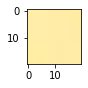

In [43]:
cell_files = os.listdir("files/cells")
avgRGBs = []
for i in range(900):
    img_bgr = cv2.imread(f"files/cells/{i}.jpg")
    avgRGBs.append(list(img_bgr.mean(axis=(0,1))))

    if (labels_n[i]<1):
        print(i, labels_v[i])
        show(img_bgr)
    

In [7]:
# Assign values to the X and y variables:
X = avgRGBs
y = labels_n

# Split dataset into random train and test subsets:
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.15) 

In [8]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler().fit(X_train_o)

In [9]:
X_train = scaler.transform(X_train_o)
X_test = scaler.transform(X_test_o)

### KNeighborsClassifier

In [10]:
# Use the KNN classifier to fit data:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = knn_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[26  1  0  0  0  0]
 [ 5 16  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  1 22]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.94      0.76      0.84        21
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        27
           4       0.96      1.00      0.98        22
           5       1.00      0.96      0.98        23

    accuracy                           0.95       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



### SVM

In [11]:
# Use the SVC classifier to fit data:
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = svc_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[26  1  0  0  0  0]
 [ 4 17  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  2 21]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.94      0.81      0.87        21
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        27
           4       0.92      1.00      0.96        22
           5       1.00      0.91      0.95        23

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



In [18]:
def predict(cl, v):
    print(cl)
    print(cl.predict_proba(v))
    print(map_n2v[int(cl.predict(v))])

In [23]:
# vo = [10,127,10]
# v = scaler.transform([vo]) 


def process(i):
    v = [X_test[i]]
    print(v, map_n2v[y_test[i]])
    predict(knn_classifier,v)
    predict(svc_classifier,v) 
    pix = np.array([np.array([np.array([X_test_o[i][2],X_test_o[i][1],X_test_o[i][0]]).astype(int)])])    
    plt.imshow(pix)
    print(pix)
    plt.show()

[array([1.03157587, 1.19981533, 0.77572182])] y
KNeighborsClassifier(n_neighbors=6)
[[1. 0. 0. 0. 0. 0.]]
w
SVC(probability=True)
[[0.85117476 0.14112165 0.0016693  0.00308978 0.00139627 0.00154824]]
w
[[[253 239 183]]]


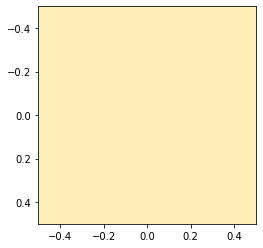

[array([0.85188408, 1.13868923, 0.79087434])] w
KNeighborsClassifier(n_neighbors=6)
[[0.83333333 0.16666667 0.         0.         0.         0.        ]]
w
SVC(probability=True)
[[0.74726445 0.24347888 0.00172392 0.00344515 0.00149424 0.00259337]]
w
[[[254 235 173]]]


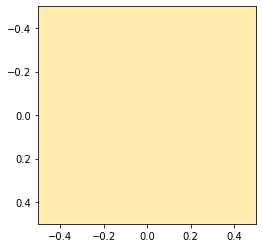

(None, None)

In [26]:
process(1), process(2)